In [34]:
%matplotlib inline
import keras
from keras.models import Sequential # Stacks layers
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import plot_model, to_categorical
from keras.datasets import reuters
from keras import layers
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

253


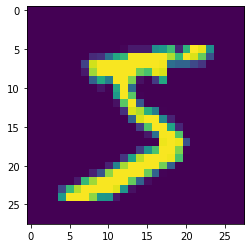

In [19]:
# Sample CNN on mnist dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()
sample_image = X_train[0]
plt.imshow(sample_image)
# Each pixel is a number between 0 and 255 (28*28)
print(sample_image[22][11])

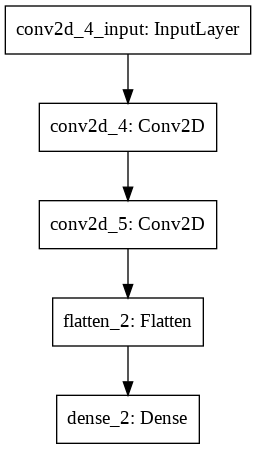

In [20]:
# Sample CNN Architecture
num_classes = 10
model = Sequential()
# Stop training model 
early_stopping = EarlyStopping()

model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes,activation='softmax'))

# model.summary()
plot_model(model,to_file='model.png')

In [25]:
# Training the above model
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

# Reshape data for model
X_train = X_train.reshape(60000,28,28,1) # 60k training samples
X_test = X_test.reshape(10000,28,28,1)

# One hot encoding (represent categorical variables as binary vectors)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=12,callbacks=[early_stopping])

Epoch 1/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2718 - accuracy: 0.9525 - val_loss: 0.0919 - val_accuracy: 0.9717
Epoch 2/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0666 - accuracy: 0.9802 - val_loss: 0.0976 - val_accuracy: 0.9734


In [26]:
# Loss/Accuracy: Training set, val_loss/val_accuracy on validation data
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:',score[1])

Test Loss: 0.09760171920061111
Test Accuracy: 0.9733999967575073


In [37]:
# CNN for NLP (Reuters News Topic Classification)
(X_train, y_train),(X_test,y_test) = reuters.load_data(num_words=None,test_split=0.2)

batch_size = 32
epochs = 12
maxlen = 10000
embedding_dim = 128
num_filters = 64
kernal_size = 5

In [38]:
# Data prep
word_index = reuters.get_word_index(path='reuters_word_index.json')
num_classes = max(y_train) + 1
index_to_word = {}
for key, value in word_index.items():
  index_to_word[value] = key

In [39]:
# Tokenise Input Data
tokeniser = Tokenizer(num_words=maxlen)
X_train = tokeniser.sequences_to_matrix(X_train,mode='binary')
X_test = tokeniser.sequences_to_matrix(X_test,mode='binary')

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [40]:
# Define model
model = Sequential()
model.add(layers.Embedding(512,embedding_dim,input_length=maxlen))
model.add(layers.Conv1D(num_filters,kernal_size,activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(num_classes,activation='softmax'))

# Compile and get Accuracy
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
# Train and Evaluate
history = model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_split=0.1)

score = model.evaluate(X_test,y_test,batch_size=batch_size,verbose=1)
print('Test Loss:',score[0])
print('Test Accuracy:',score[1])

Epoch 1/12
253/253 [==============================] - 25s 98ms/step - loss: 2.4418 - accuracy: 0.3677 - val_loss: 2.3579 - val_accuracy: 0.4038
Epoch 2/12
253/253 [==============================] - 24s 97ms/step - loss: 2.2583 - accuracy: 0.4084 - val_loss: 2.3151 - val_accuracy: 0.4138
Epoch 3/12
253/253 [==============================] - 24s 97ms/step - loss: 2.2382 - accuracy: 0.4105 - val_loss: 2.3058 - val_accuracy: 0.4027
Epoch 4/12
253/253 [==============================] - 24s 97ms/step - loss: 2.2227 - accuracy: 0.4253 - val_loss: 2.2847 - val_accuracy: 0.4283
Epoch 5/12
253/253 [==============================] - 24s 97ms/step - loss: 2.2096 - accuracy: 0.4260 - val_loss: 2.2919 - val_accuracy: 0.4182
Epoch 6/12
253/253 [==============================] - 24s 97ms/step - loss: 2.2030 - accuracy: 0.4349 - val_loss: 2.2769 - val_accuracy: 0.4338
Epoch 7/12
253/253 [==============================] - 24s 97ms/step - loss: 2.2016 - accuracy: 0.4287 - val_loss: 2.2605 - val_accuracy: